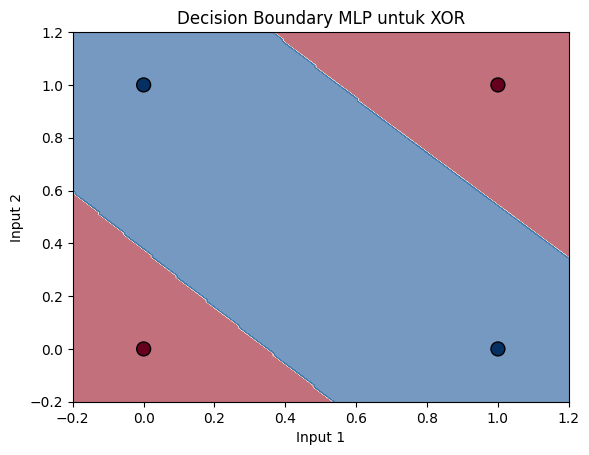

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Inisialisasi Parameter
# ==============================
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

def sigmoid_derivative(x):
    return x * (1 - x)

def forward(X, params):
    z1 = np.dot(X, params["W1"]) + params["b1"]
    a1 = sigmoid(z1)
    z2 = np.dot(a1, params["W2"]) + params["b2"]
    a2 = sigmoid(z2)
    cache = {"a1": a1, "a2": a2}
    return a2, cache

def backward(X, y, params, cache, lr=0.1):
    m = X.shape[0]
    dZ2 = cache["a2"] - y
    dW2 = (1/m) * np.dot(cache["a1"].T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, params["W2"].T)
    dZ1 = dA1 * sigmoid_derivative(cache["a1"])
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    params["W2"] -= lr * dW2
    params["b2"] -= lr * db2
    params["W1"] -= lr * dW1
    params["b1"] -= lr * db1
    return params

def train(X, y, params, epochs, lr=0.1):
    for epoch in range(epochs):
        output, cache = forward(X, params)
        params = backward(X, y, params, cache, lr)
    return params

def predict(X, params):
    output, _ = forward(X, params)
    return (output > 0.5).astype(int)

# ==============================
# Dataset XOR
# ==============================
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# ==============================
# Training
# ==============================
params = initialize_parameters(input_size=2, hidden_size=4, output_size=1)
params = train(X, y, params, epochs=10000, lr=0.5)

# ==============================
# Visualisasi Decision Boundary
# ==============================
# Buat grid titik di area [0,1] x [0,1]
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200),
                     np.linspace(-0.2, 1.2, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Prediksi untuk setiap titik grid
Z = predict(grid, params)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)

# Plot data asli XOR
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.RdBu, edgecolors='k', s=100)

plt.title("Decision Boundary MLP untuk XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


In [2]:
#pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.20.0


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [6]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=np.float32)
y = np.array([[0],
              [1],
              [1],
              [0]], dtype=np.float32)

model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(4, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

optimizer = SGD(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X, y, epochs=1000, verbose=0)

In [12]:
predictions = (model.predict(X) > 0.5).astype(int)

print("\nPrediksi XOR dengan Keras:")
for i in range(len(X)):
    print(f"{X[i]} -> {predictions[i][0]} (target: {y[i][0]})")

loss, acc = model.evaluate(X, y, verbose=0)
print(f"\nAkurasi: {acc:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Prediksi XOR dengan Keras:
[0. 0.] -> 0 (target: 0.0)
[0. 1.] -> 1 (target: 1.0)
[1. 0.] -> 1 (target: 1.0)
[1. 1.] -> 0 (target: 0.0)

Akurasi: 100.00%


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Model sederhana
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, verbose=0)

# Simpan model
model.save("xor_model.h5")

f:\python\ml2025\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


python 11xorapi.py